<a href="https://colab.research.google.com/github/SuryARavichan/PYTHON-FOR-DATA-SCIENCE-BDA-/blob/main/PDS_notebook9_EDA_Covid_USA_tri_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_json("https://data.cdc.gov/resource/9mfq-cb36.json?$limit=25000")
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,conf_death,prob_death
0,2021-03-11T00:00:00.000,SC,535252,454965.0,80287.0,1086,375.0,8794,40,6.0,2021-03-11 00:00:00.000,Agree,Not agree,NaN,NaN
1,2020-11-06T00:00:00.000,LA,191715,NaN,NaN,870,0.0,6016,21,0.0,2020-11-07 14:45:17.940,Not agree,Agree,5787.0,229.0
2,2021-12-03T00:00:00.000,KY,799287,564491.0,234796.0,2962,1073.0,12324,21,2.0,2021-12-03 00:00:00.000,Agree,Agree,10648.0,1676.0
3,2020-05-14T00:00:00.000,MD,35903,NaN,NaN,1091,0.0,1934,50,2.0,2020-05-16 00:00:00.000,N/A,Agree,1837.0,97.0
4,2020-11-03T00:00:00.000,FSM,0,0.0,0.0,0,0.0,0,0,0.0,2020-11-03 00:00:00.000,Agree,Agree,0.0,0.0


In [ ]:
df.shape

(25000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  25000 non-null  object        
 1   state            25000 non-null  object        
 2   tot_cases        25000 non-null  int64         
 3   conf_cases       14477 non-null  float64       
 4   prob_cases       14454 non-null  float64       
 5   new_case         25000 non-null  int64         
 6   pnew_case        23533 non-null  float64       
 7   tot_death        25000 non-null  int64         
 8   new_death        25000 non-null  int64         
 9   pnew_death       23550 non-null  float64       
 10  created_at       25000 non-null  datetime64[ns]
 11  consent_cases    23359 non-null  object        
 12  consent_deaths   22862 non-null  object        
 13  conf_death       14305 non-null  float64       
 14  prob_death       14305 non-null  float

That being said, the “probable” and “confirmed” columns in this dataset should be removed, because data with inconsistent values is going to get in the way of a proper analysis. The columns “consent_cases” and “consent_deaths” can be removed for the same reason

In [ ]:
to_drop = ['conf_cases','prob_cases','pnew_case','conf_death','prob_death','pnew_death','created_at', 'consent_cases','consent_deaths',]
df.drop(to_drop, inplace=True, axis=1)

In [ ]:
df.columns

Index(['submission_date', 'state', 'tot_cases', 'new_case', 'tot_death',
       'new_death'],
      dtype='object')

In [ ]:
df['submission_date']

0        2021-03-11T00:00:00.000
1        2020-11-06T00:00:00.000
2        2021-12-03T00:00:00.000
3        2020-05-14T00:00:00.000
4        2020-11-03T00:00:00.000
                  ...           
24995    2022-02-27T00:00:00.000
24996    2022-01-13T00:00:00.000
24997    2022-07-14T00:00:00.000
24998    2021-05-08T00:00:00.000
24999    2020-08-20T00:00:00.000
Name: submission_date, Length: 25000, dtype: object

The column “submission_date” still presents us with some problems. Extraneous numbers, a lack of chronological order, and an unaesthetic name are all issues we have to address. While we’re at it, let’s also change the names of the other columns to make them more presentable.

In [ ]:
df = df.rename(columns={'submission_date': 'Date'})
df['Date']=pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'])
df = df.rename(columns={'state':'State'})
df = df.rename(columns={'tot_death':'Total_Deaths', 'new_death':'New_Deaths'})
df = df.rename(columns={'tot_cases':'Total_Cases', 'new_case':'New_Cases'})

A clean, neatly named and properly ordered data. The last thing left to do is to filter out the states that aren’t in the Tri-State Area. Let’s make a new dataframe exclusively for New York, New Jersey and Connecticut.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 24869 to 5543
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          25000 non-null  datetime64[ns]
 1   State         25000 non-null  object        
 2   Total_Cases   25000 non-null  int64         
 3   New_Cases     25000 non-null  int64         
 4   Total_Deaths  25000 non-null  int64         
 5   New_Deaths    25000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.3+ MB


In [ ]:
import seaborn as sns

Text(0, 0.5, 'Active Cases')

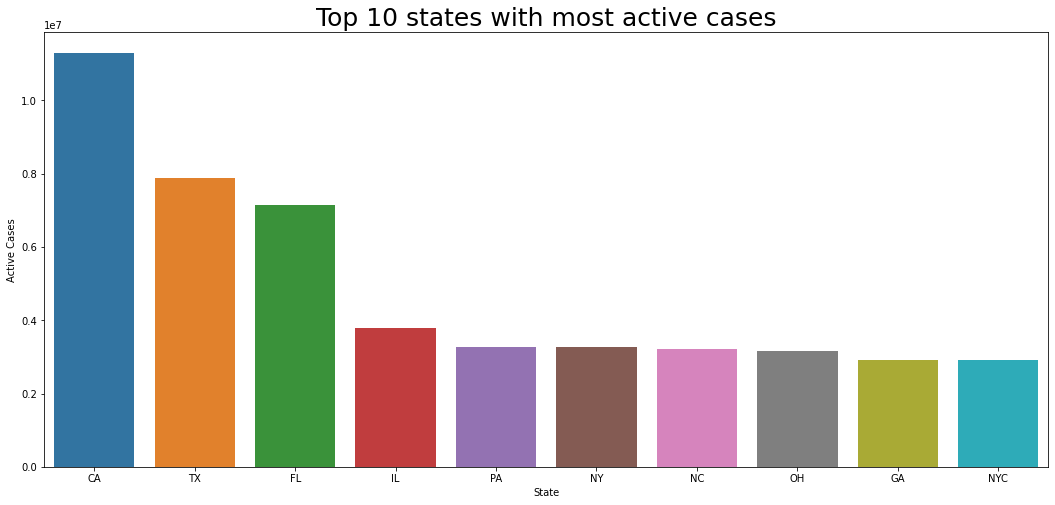

In [ ]:
# top 10 states with Total cases
top_10_total_cases = df.groupby(by = 'State').max()[['Total_Cases' , 'Date']].sort_values(by='Total_Cases',ascending = False).reset_index()
fig = plt.figure(figsize=(18,8))
ax = sns.barplot(data = top_10_total_cases.iloc[:10], y='Total_Cases', x='State')
plt.title('Top 10 states with most active cases',size = 25)
plt.xlabel('State')
plt.ylabel('Active Cases')

In [ ]:
df.tail()

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths
17888,2022-10-13,TN,2349636,905,27999,19
6797,2022-10-13,CA,11305666,21329,95604,190
21327,2022-10-13,CO,1662514,869,13365,11
6110,2022-10-13,NJ,2765472,2132,34810,5
5543,2022-10-13,ID,497728,0,5198,0


In [ ]:
dfTRI = df[(df["State"].str.contains('NY|NJ|CT', na=False))]
dfTRI.head()

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths
7931,2020-01-22,CT,0,0,0,0
13001,2020-01-24,CT,0,0,0,0
9231,2020-01-25,NJ,0,0,0,0
19689,2020-01-26,NYC,0,0,0,0
10949,2020-01-26,NJ,0,0,0,0


The first case of COVID-19 in the Tri-State Area isn’t listed until March 2nd, which is nearly three months after the dataset begins its records. We don’t need an entire season of zeroes here, so we’re only going to show rows with a total number of cases greater than zero.

In [ ]:
dfTRI = dfTRI[dfTRI.Total_Cases > 0]
dfTRI.head()

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths
14571,2020-03-04,NY,1,1,0,0
12327,2020-03-05,NJ,2,2,0,0
19913,2020-03-06,NYC,7,5,1,0
17501,2020-03-07,NY,28,7,0,0
15774,2020-03-07,NYC,10,3,1,0


In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

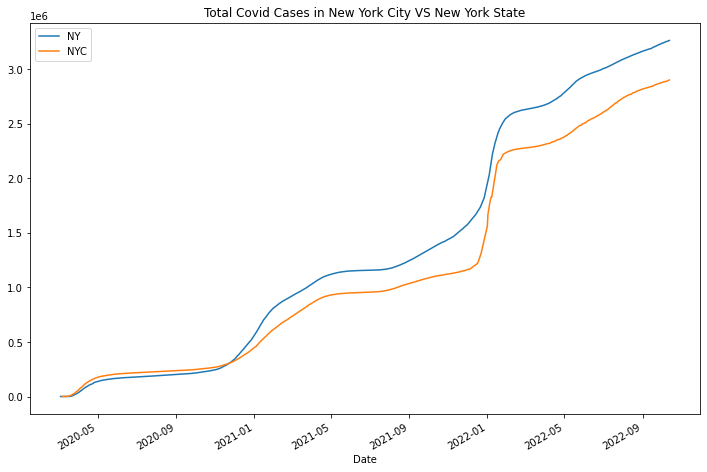

In [ ]:
dfNY = dfTRI[(dfTRI['State'].str.contains('NY', na=False))]
ax = plt.gca()
dfNY.groupby('State').plot(kind='line', x='Date', y='Total_Cases', ax=ax)
plt.title("Total Covid Cases in New York City VS New York State")
ax.legend(['NY','NYC'])

Both New York’s show fairly similar trends in the growth of total COVID cases over time.

The populations of these regions are not identical, but they are in the same range — with about 8.33 million people in 2019, New York City comprised nearly half the total population of New York State, which was inhabited by around 19.5 million people in the same year,with both a lower population and a higher total case count, it would appear that New York City fared worse in total COVID-19 case numbers than New York State in the earliest months of the pandemic. However, the two New York’s begin to meet in the middle towards the end of November, and the total number of cases in New York State outpaces that of its urban counterpart the more that time goes on. Unfortunately, without a precise measure of population in 2020, it’s hard to say whether the total case count per capita of New York actually rose above New York City’s in the past few months. What is apparent, though, is that something caused the case count trends to reverse around the start of the holiday season.

The seasonal change from Autumn to Winter was probably a major factor in rising case numbers for both locations, as people neglected social distancing in order to spend the holidays with friends and family members that they might have avoided throughout the first half of the year. Another factor in rising case numbers might be the colder weather of the winter months forcing more activities from outside to inside, where the lack of distancing space and air circulation lead to a better environment for viral transmission.

Let’s analyze a single state (New Jersey) in a bit more detail

Text(0.5, 1.0, 'Covid Stats in New Jersey')

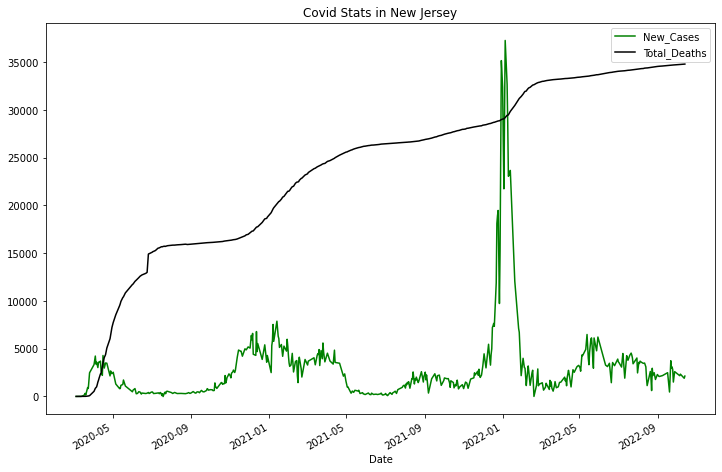

In [ ]:
dfNYS = dfNY[~dfNY.State.str.contains('NYC')]
dfNYC = dfNY[(dfNY['State'].str.contains('NYC', na=False))]
dfNJ = dfTRI[(dfTRI['State'].str.contains('NJ', na=False))]
dfCT = dfTRI[(dfTRI['State'].str.contains('CT', na=False))]
ax = plt.gca()
#dfNJ.plot(kind='line', x='Date', y='Total_Cases', color='blue', ax=ax)
dfNJ.plot(kind='line', x='Date', y='New_Cases', color='green', ax=ax)
dfNJ.plot(kind='line', x='Date', y='Total_Deaths', color='black', ax=ax)
#dfNJ.plot(kind='line', x='Date', y='New_Deaths', color='red', ax=ax)
plt.title('Covid Stats in New Jersey')

Text(0.5, 1.0, 'Covid Stats in New York City')

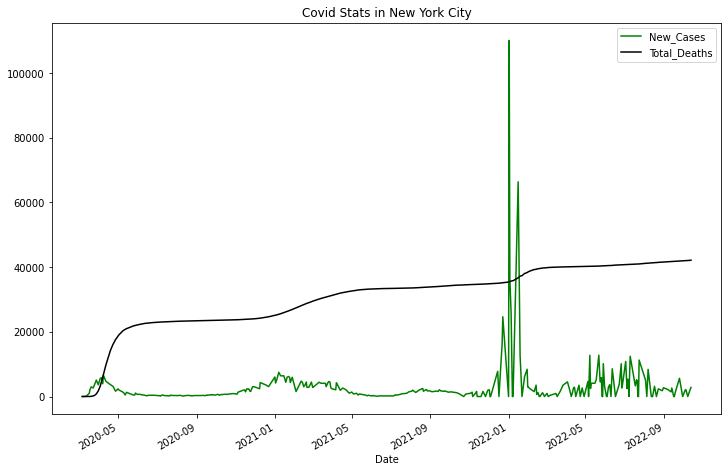

In [ ]:
ax = plt.gca()
dfNYC.plot(kind='line', x='Date', y='New_Cases', color='green', ax=ax)
dfNYC.plot(kind='line', x='Date', y='Total_Deaths', color='black', ax=ax)
plt.title('Covid Stats in New York City')

Text(0.5, 1.0, 'Covid Stats in New York State')

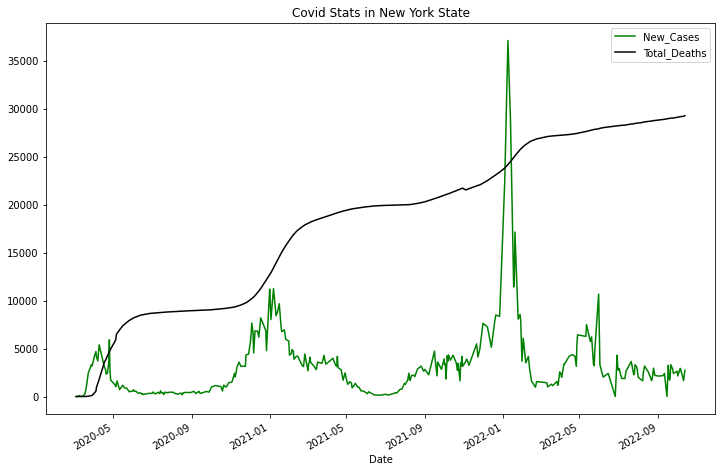

In [ ]:
ax = plt.gca()
dfNYS.plot(kind='line', x='Date', y='New_Cases', color='green', ax=ax)
dfNYS.plot(kind='line', x='Date', y='Total_Deaths', color='black', ax=ax)
plt.title('Covid Stats in New York State')

Text(0.5, 1.0, 'Covid Stats in CT')

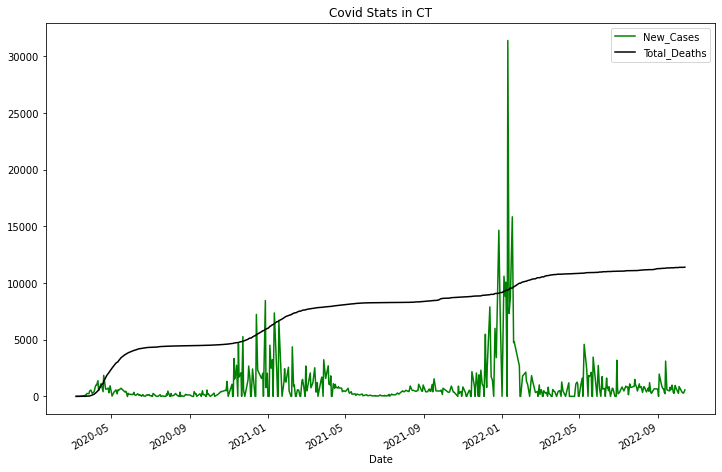

In [ ]:
ax = plt.gca()
dfCT.plot(kind='line', x='Date', y='New_Cases', color='green', ax=ax)
dfCT.plot(kind='line', x='Date', y='Total_Deaths', color='black', ax=ax)
plt.title('Covid Stats in CT')